In [1]:
!pip install findspark

In [5]:
import findspark

In [6]:
findspark.init("C:\spark")

In [7]:
from pyspark import SparkContext

# Big Data

## Spark Uygulaması Başaltılması

In [12]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
spark = SparkSession.builder.master("local").appName("pyspark_giris").getOrCreate()
sc = spark.sparkContext

In [13]:
sc

<SparkContext master=local appName=pyspark_giris>

In [14]:
sc.version

'3.0.0-preview2'

In [15]:
sc.appName

'pyspark_giris'

In [16]:
#sc.stop() (işimiz bitince mutlaka bu komutla kapatılması gerek)

## Temel DataFrame İşlemleri

In [17]:
spark_df = spark.read.csv("./churn.csv",header = True,inferSchema = True)

In [18]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [19]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [20]:
spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [22]:
import seaborn as sns
df = sns.load_dataset("diamonds")
type(df)

pandas.core.frame.DataFrame

In [23]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [24]:
spark_df.head()

Row(_c0=0, Names='Cameron Williams', Age=42.0, Total_Purchase=11066.8, Account_Manager=0, Years=7.22, Num_Sites=8.0, Churn=1)

In [25]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [26]:
spark_df.dtypes

[('_c0', 'int'),
 ('Names', 'string'),
 ('Age', 'double'),
 ('Total_Purchase', 'double'),
 ('Account_Manager', 'int'),
 ('Years', 'double'),
 ('Num_Sites', 'double'),
 ('Churn', 'int')]

In [29]:
spark_df.show(3,truncate = True)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 3 rows



In [31]:
spark_df.count()

900

In [33]:
spark_df.columns

['_c0',
 'Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Churn']

In [34]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|               _c0|        Names|              Age|   Total_Purchase|   Account_Manager|            Years|         Num_Sites|              Churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [36]:
spark_df.describe("Age").show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|              900|
|   mean|41.81666666666667|
| stddev|6.127560416916251|
|    min|             22.0|
|    max|             65.0|
+-------+-----------------+



In [37]:
spark_df.filter(spark_df.Age>40).count()

524

In [38]:
spark_df.groupby("Churn").count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [39]:
spark_df.groupby("Churn").agg({"Age":"mean"}).show()

+-----+-----------------+
|Churn|         avg(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



## SQL İşlemleri

In [41]:
spark_df.createOrReplaceTempView("tbl_df") # Sql işlemleri için geçici tablo oluşturduk

In [42]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [43]:
spark.sql("show tables").show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
|        |   tbl_df|       true|
+--------+---------+-----------+



In [46]:
spark.sql("select Age from tbl_df").show(5)

+----+
| Age|
+----+
|42.0|
|41.0|
|38.0|
|42.0|
|37.0|
+----+
only showing top 5 rows



In [47]:
spark.sql("select Churn, mean(Age) from tbl_df group by Churn").show()

+-----+-----------------+
|Churn|         avg(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



## Büyük Veride Görselleştirme

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
sdf = spark_df.toPandas() # Sparkı Pandas dataframe çevirdik

In [51]:
sdf.head()

,_c0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1
1,1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1
2,2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1
3,3,Phillip White,42.0,8010.76,0,6.71,10.0,1
4,4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1


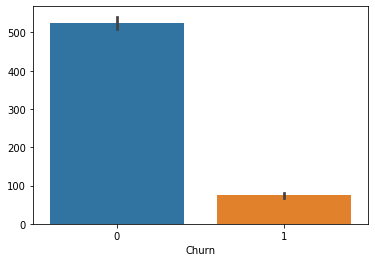

In [53]:
sns.barplot(x = "Churn",y=sdf.Churn.index,data = sdf);

## Makine Öğrenmesi

In [54]:
spark_df = spark.read.csv("./churn.csv",header = True,inferSchema = True)

In [55]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [56]:
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns]) # İsimleri küçültme

In [57]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [59]:
spark_df = spark_df.withColumnRenamed("_c0","index")

In [60]:
spark_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [61]:
len(spark_df.columns)

8

In [62]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [64]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [65]:
spark_df.select("age","total_purchase","account_manager","years","num_sites","churn").describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [66]:
spark_df = spark_df.dropna() # eksik verileri silme

In [67]:
spark_df = spark_df.withColumn("age_kare"
                              ,spark_df.age**2)

In [68]:
spark_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
only showing top 3 rows



In [69]:
#Bağımlı Değişkeni Belirtme

In [70]:
from pyspark.ml.feature import StringIndexer

In [73]:
stringIndexer = StringIndexer(inputCol = "churn", outputCol="label")
mod = stringIndexer.fit(spark_df)
indexed = mod.transform(spark_df)
spark_df = indexed.withColumn("label",indexed["label"].cast("integer"))

In [75]:
spark_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|label|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
only showing top 3 rows



In [76]:
# Bağımsız Değişkenler

In [77]:
from pyspark.ml.feature import VectorAssembler

In [78]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'age_kare',
 'label']

In [79]:
bagımsız_degiskenler = ["age","total_purchase","account_manager","years","num_sites"]

In [81]:
vectorAssembler = VectorAssembler(inputCols = bagımsız_degiskenler,outputCol = "features")
va_df = vectorAssembler.transform(spark_df)

In [82]:
va_df

DataFrame[index: int, names: string, age: double, total_purchase: double, account_manager: int, years: double, num_sites: double, churn: int, age_kare: double, label: int, features: vector]

In [83]:
va_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+--------------------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|label|            features|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+--------------------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|    1|[42.0,11066.8,0.0...|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|    1|[41.0,11916.22,0....|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|    1|[38.0,12884.75,0....|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+--------------------+
only showing top 3 rows



In [84]:
final_df = va_df.select(["features","label"])

In [85]:
final_df.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
+--------------------+-----+
only showing top 3 rows



In [86]:
# Test - Train

In [87]:
splits = final_df.randomSplit([0.70,0.30])
train_df = splits[0]
test_df = splits[1]

In [88]:
test_df

DataFrame[features: vector, label: int]

In [89]:
train_df

DataFrame[features: vector, label: int]

### GBM ile Müşteri Terk Modellemesi

In [91]:
from pyspark.ml.classification import GBTClassifier

In [99]:
gbm = GBTClassifier(maxIter = 10, featuresCol = "features", labelCol = "label")
gbm_model = gbm.fit(train_df)

In [100]:
y_pred = gbm_model.transform(test_df)

In [101]:
y_pred

DataFrame[features: vector, label: int, rawPrediction: vector, probability: vector, prediction: double]

In [102]:
ac = y_pred.select("label","prediction")

In [103]:
ac.filter(ac.label == ac.prediction).count()/ac.count()

0.8897058823529411

### Model Tuning

In [105]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator = BinaryClassificationEvaluator()

paramGrid = (ParamGridBuilder().addGrid(gbm.maxDepth,[2,4])
             .addGrid(gbm.maxBins,[20,30]).build())
cv = CrossValidator(estimator=gbm,estimatorParamMaps=paramGrid,evaluator=evaluator,numFolds=5)

In [106]:
cvModel = cv.fit(train_df)

In [107]:
y_pred = cvModel.transform(test_df)

In [108]:
ac = y_pred.select("label","prediction")

In [109]:
ac.filter(ac.label == ac.prediction).count()/ac.count()

0.9007352941176471

In [110]:
# Yeni Müşteri Terk Eder mi etmez mi?

In [113]:
import pandas as pd

names = pd.Series(["Ali","Taner","Berkay","Polat","Kamil"])
age = pd.Series([38,43,34,50,40])
total_purchase = pd.Series([30000,10000,6000,30000,100000])
account_manager = pd.Series([1,0,0,1,1])
years = pd.Series([20,10,3,8,30])
num_sites = pd.Series([30,8,8,6,50])

yeni_musteriler = pd.DataFrame({
    "names":names,
    "age": age,
    "total_purchase":total_purchase,
    "account_manager":account_manager,
    "years":years,
    "num_sites":num_sites})

yeni_musteriler.columns

Index(['names', 'age', 'total_purchase', 'account_manager', 'years',
       'num_sites'],
      dtype='object')

In [115]:
yeni_sdf = spark.createDataFrame(yeni_musteriler)
yeni_sdf.show()

+------+---+--------------+---------------+-----+---------+
| names|age|total_purchase|account_manager|years|num_sites|
+------+---+--------------+---------------+-----+---------+
|   Ali| 38|         30000|              1|   20|       30|
| Taner| 43|         10000|              0|   10|        8|
|Berkay| 34|          6000|              0|    3|        8|
| Polat| 50|         30000|              1|    8|        6|
| Kamil| 40|        100000|              1|   30|       50|
+------+---+--------------+---------------+-----+---------+



In [116]:
yeni_musteriler = vectorAssembler.transform(yeni_sdf)

In [117]:
results = cvModel.transform(yeni_musteriler)

In [118]:
results.select("names","prediction").show()

+------+----------+
| names|prediction|
+------+----------+
|   Ali|       1.0|
| Taner|       0.0|
|Berkay|       0.0|
| Polat|       0.0|
| Kamil|       1.0|
+------+----------+

